In [15]:
import spacy
import pandas as pd
from re import sub as regex
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
from nltk.stem import PorterStemmer as Stemmer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [16]:
df = pd.read_csv("undersampled_spam.csv", encoding='latin')
df = df.drop(columns=["Unnamed: 0"])
df.sample(5)

,type,sms,processedSMS,filteredSMS
434,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
975,1,U have a secret admirer who is looking 2 make ...,u secret admir look 2 make contact u find r re...,"['u', 'secret', 'admir', 'look', '2', 'make', ..."
243,0,Short But Cute: \Be a good person,short cute good person,"['short', 'cute', 'good', 'person']"
7,0,Sac needs to carry on:),sac need carri,"['sac', 'need', 'carri']"
1042,1,You are a winner you have been specially selec...,winner special select receiv 1000 cash 2000 aw...,"['winner', 'special', 'select', 'receiv', '100..."


In [17]:
def preprocess(sms):
    # Removes special characters - only letters and numbers remain + lowers text
    sms = regex(r"[^a-zA-Z0-9]", " ", sms.lower())
    # Utilizes NLTK to tokenize text
    sms = word_tokenize(sms)
    # Utilizes removes NLTK stopwords from sms
    sms = [word for word in sms if word not in stopwords.words("english")]
    # Utilizes NLTK Stemmer to stem words
    sms = [Stemmer().stem(word) for word in sms]
    return " ".join(sms)

In [18]:
def predict(model, sms, label):
    nlp = spacy.load('en_core_web_sm')
    print(f"Correct: {label} - Prediction - {model.predict(nlp(preprocess(sms)).vector.reshape(1, -1))}")

In [19]:
def run(model):
    print(model)

    # Loading Data
    df = pd.read_csv("undersampled_spam.csv", encoding='latin')
    df = df.dropna()

    # Processing Data
    embedder = spacy.load('en_core_web_sm')
    spacy_layer = [embedder(i).vector.reshape(1, -1)[0] for i in df['processedSMS']]

    # Splitting Data
    features, labels = spacy_layer , df['type']
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2022, stratify=labels)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=2022, stratify=y_test)

    # Train Model
    pipeline = Pipeline([('Normalizer', MinMaxScaler()), ('model', model)]).fit(x_train, y_train)

    # Validate Model
    print("Validation Results:")
    y_pred = pipeline.predict(x_val)
    print(classification_report(y_val, y_pred))

    # Test Model
    print("Testing Results:")
    y_pred = pipeline.predict(x_test)
    print(classification_report(y_test, y_pred))

    # More Testing Results
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, zero_division=0)}')
    print(f'Recall: {recall_score(y_test, y_pred, zero_division=0)}')
    rc1, rc2, rc3 = precision_recall_curve(y_test, y_pred)
    print(f'PR_AUC: {auc(rc2,  rc1)}')
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1]).plot()
    plt.axis('off')
    plt.show()

    # Test Model on real-life sms
    predict(pipeline, "how is your day going?", 0)
    predict(pipeline, "wanna go to the park?", 0)
    predict(pipeline, "bro, the movie was great! You should watch it too.", 0)
    predict(pipeline, "free $50 amazon gift card reply back now", 1)
    predict(pipeline, "Bank of America closed your bank account. Please confirm your pin at bankofamerica.com/cx1234124r1234vb to keep your account activated", 1)
    predict(pipeline, "You've won a prize! Go to bit.ly/yourprize001 to claim your $500 Amazon gift card", 1)

<p style="text-align: center;">ComplementNB</p>

ComplementNB()
Validation Results:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       112
           1       0.84      0.95      0.89       112

    accuracy                           0.88       224
   macro avg       0.89      0.88      0.88       224
weighted avg       0.89      0.88      0.88       224

Testing Results:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       112
           1       0.89      0.94      0.91       112

    accuracy                           0.91       224
   macro avg       0.91      0.91      0.91       224
weighted avg       0.91      0.91      0.91       224

Accuracy: 0.9107142857142857
Precision: 0.8898305084745762
Recall: 0.9375
PR_AUC: 0.9292902542372881


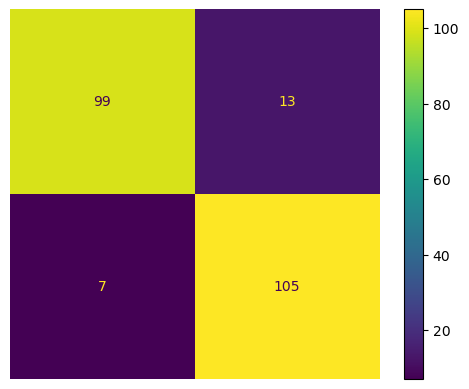

Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 1 - Prediction - [1]
Correct: 1 - Prediction - [1]
Correct: 1 - Prediction - [1]


In [20]:
run(ComplementNB())

<p style="text-align: center;">Neural Network</p>

MLPClassifier(max_iter=3000)
Validation Results:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       112
           1       0.88      0.96      0.91       112

    accuracy                           0.91       224
   macro avg       0.91      0.91      0.91       224
weighted avg       0.91      0.91      0.91       224

Testing Results:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       112
           1       0.92      0.96      0.94       112

    accuracy                           0.94       224
   macro avg       0.94      0.94      0.94       224
weighted avg       0.94      0.94      0.94       224

Accuracy: 0.9375
Precision: 0.9224137931034483
Recall: 0.9553571428571429
PR_AUC: 0.9500461822660099


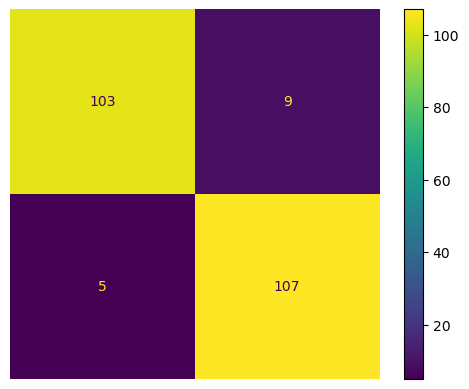

Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 1 - Prediction - [1]
Correct: 1 - Prediction - [1]
Correct: 1 - Prediction - [1]


In [21]:
run(MLPClassifier(max_iter=3000))